# <font style="color:rgb(50,120,229)">Math Operations</font>
The most basic operations like addition and multiplication are very heavily used in all image processing and computer vision applications.
We will look into two simple operations on images- changing contrast and brightness of the image using arithmetic operations like multiplication and addition.

**Important note:** Datatype Conversion

An image is represented as a numpy array once it's read using **`cv2.imread`** function. The default datatype of this object is **uint** (**8 bits**). For most Arithmentic operations like multiplication or division, we need to convert the array type to floating point with each pixel having **16, 32 or 64 bits** of data. This helps prevent overflow while working with the images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread("DATA/boy.jpg")
print(image[0,0])

[218 205 213]


In [3]:
# Convert unsigned int to float
image = np.float32(image)
print(image[0,0])

# Scale the values so that they lie between [0,1]
scalingFactor = 1/255.0
image = image * scalingFactor
print(image[0,0])


[218. 205. 213.]
[0.854902   0.80392164 0.8352942 ]


The scale or the scaling factor reduces the range of **0-255** to **0-1**, hence all the floating point numbers now range between 0-1. When we convert back to unsigned integer we use the **reciprocal** of the scaling factor and the range is converted from 0-1 to 0-255.

In [4]:
#Convert back to unsigned int
image = image * (1.0/scalingFactor)
image = np.uint8(image)
print (image[0,0])


[218 205 213]


# <font style="color:rgb(50,120,229)">Contrast </font>
Contrast is the difference in intensity between the brightest and darkest regions of a given image. Higher the difference, higher is the contrast. The maximum contrast of an image is also known as **Dynamic Range**. In an image with good contrast, objects are easily discernible.
One of the easiest ways to improve contrast of an image is Intensity Scaling.


## <font style="color:rgb(50,120,229)">Contrast Enhancement</font>

Lets increase the contrast by 30%.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


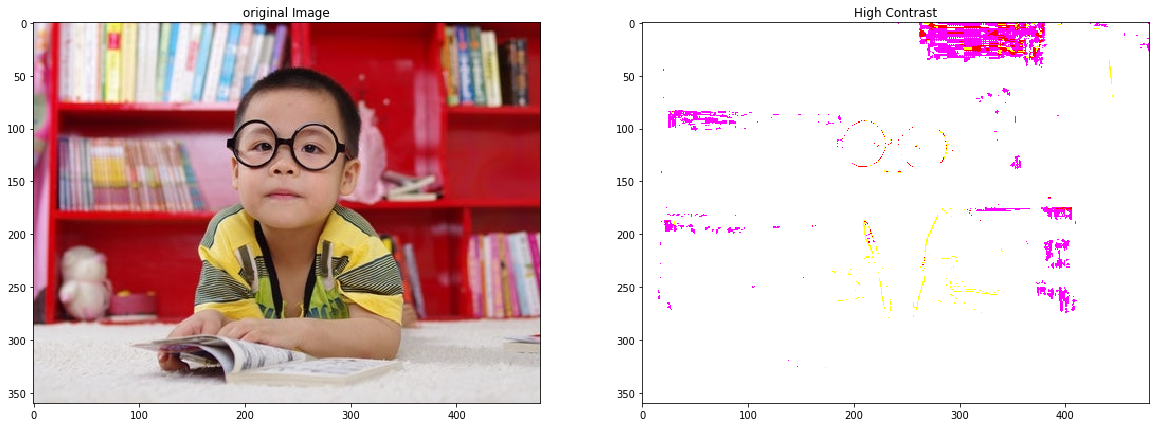

In [5]:
contrastPercentage = 30

# Multiply with scaling factor to increase contrast
contrastHigh = image * (1+contrastPercentage/100)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(contrastHigh[...,::-1]);plt.title("High Contrast");

## <font style="color:rgb(50,120,229)">What went wrong here?</font>


In [6]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(contrastHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Contrast Image Highest Pixel Intensity : {}".format(contrastHigh.max()))

Original Image Datatype : uint8
Contrast Image Datatype : float64
Original Image Highest Pixel Intensity : 255
Contrast Image Highest Pixel Intensity : 331.5


### <font style = "color:rgb(8,133,37)">Issue with Contrast Enhancement </font>
Display functions expect the images to be in either of these 2 formats:
1. If the image is a float, then the range should be [0,1]. Anything above 1 is considered as white.
1. If the image is an int, then the range should be [0,255]. Anything above 255 is considered as white.

### <font style = "color:rgb(8,133,37)">Solution </font>
We can see that the datatype of contrastHigh is float and the max value is 331.5. So to get rid of the problem we can do either of the following:
1. **`Clip`** or **`Normalize`** the intensity values to **`0 ~ 255`** and change the data type to **`uint8`**.
1. If you want to keep the image in float format, then **`Normalize`** the instensity values so that it lies in **`[0,1]`**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


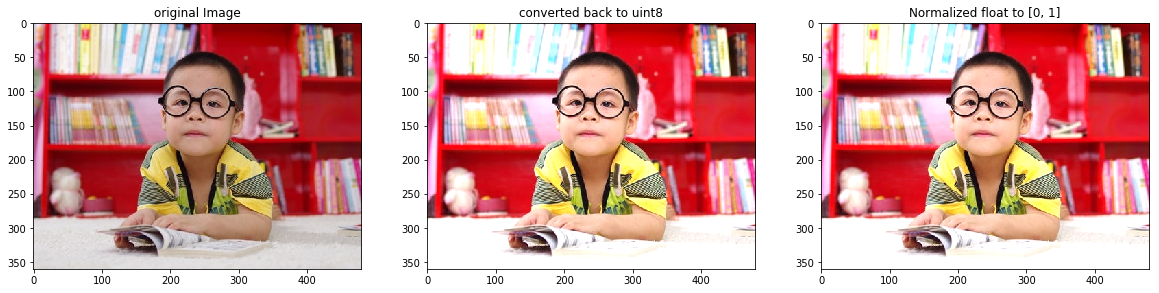

In [7]:
contrastPercentage = 30

# Clip the values to [0,255] and change it back to uint8 for display
contrastImage = image * (1+contrastPercentage/100)
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)

# Convert the range to [0,1] i.e dividing by max intensity and keep it in float format
contrastHighFloat = image * (1+contrastPercentage/100.0)
maxValue = image.max()
contrastHighNormalized01 = contrastHighFloat/maxValue

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(contrastHighClippedUint8[...,::-1]);plt.title("converted back to uint8");
plt.subplot(133);plt.imshow(contrastHighNormalized01[...,::-1]);plt.title("Normalized float to [0, 1]");


# <font style="color:rgb(50,120,229)">Brightness </font>
Brightness is a measure of light falling on the scene. In RGB color space, it can be thought of as the arithmetic mean of the R, G and B color values. 
To make an image brighter, the intensity values should be increased by some offset value and vice-versa. 

## <font style="color:rgb(50,120,229)">Brightness Enhancement</font>

We will increase the brightness by 50 intensity levels. ( Note that there are 255 intensity levels in a image)

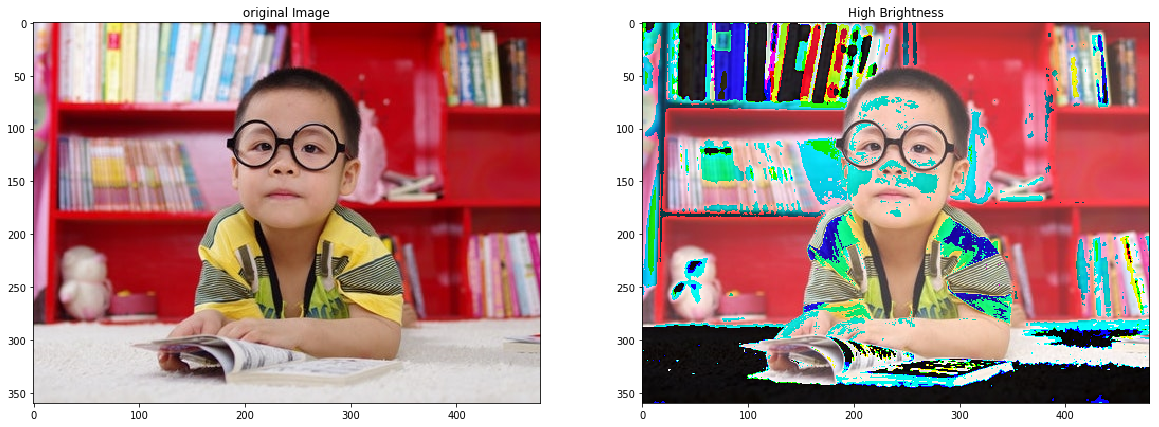

In [8]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHigh = image + brightnessOffset

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(brightHigh[...,::-1]);plt.title("High Brightness");

## <font style="color:rgb(50,120,229)">What's wrong?</font>


In [9]:
print("Original Image Datatype : {}".format(image.dtype))
print("Brightness Image Datatype : {}\n".format(brightHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Brightness Image Highest Pixel Intensity : {}".format(brightHigh.max()))


Original Image Datatype : uint8
Brightness Image Datatype : uint8

Original Image Highest Pixel Intensity : 255
Brightness Image Highest Pixel Intensity : 255


### <font style="color:rgb(50,120,229)">Issue with Brightness Enhancement Code </font>
The highest pixel intensity in the original image is 255. Since we have added 50 to each pixel, the highest pixel intensity in `brightHigh` image should have been `305`. But we can see that the highest pixel intensity is in brightHigh image is `255`.

This is happening because of the uint8 datatype. Since the maximum value that a unsigned 8 bit integer can hold is 255, any value greater than that is causing an **`overflow`**.
Similarly **`underflow`** can happen for any value lower than 0.

### <font style="color:rgb(8,133,37)">Solution </font>
In order to get rid of this problem, we can do either of the following:
1. use opencv to handle uint8 arithmetic
1. converting the datatype of the operands to higher order integers (int32/64) or float (float32/64), whichever is applicable.


### <font style="color:rgb(8,133,37)"> Using opencv add function is the easier solution</font>

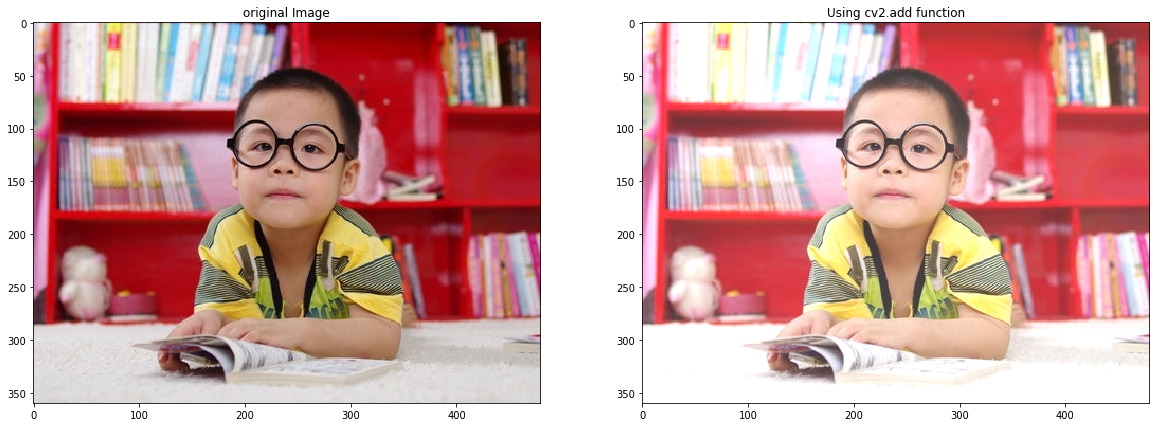

In [10]:
brightnessOffset = 50
brightnessOffset_array = np.ones(image.shape,dtype='uint8')*brightnessOffset

# Add the offset for increasing brightness
brightHighOpenCV = cv2.add(image, brightnessOffset_array)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function");
